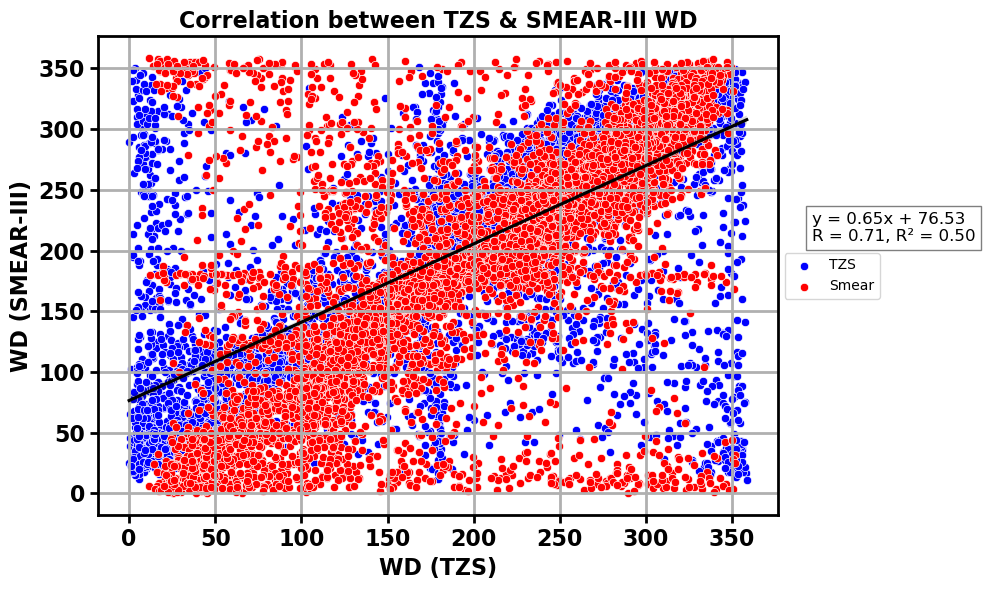

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Define file path (Update this path as needed)
file_path = '/Users/touqeergill/Desktop/Windrose (TZS and Smear).xlsx'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name='Sheet 1')

# Drop missing values
df_cleaned = df.dropna(subset=["WD TZS", "WD Smear"])

# Compute linear regression and correlation values
slope, intercept, r_value, p_value, std_err = linregress(df_cleaned["WD TZS"], df_cleaned["WD Smear"])
correlation_coefficient = r_value
r_squared = correlation_coefficient ** 2

# Create a scatter plot with circular markers
plt.figure(figsize=(10, 6))

# Plot TZS wind direction data points in blue with circular markers
sns.scatterplot(x=df_cleaned["WD TZS"], y=df_cleaned["WD Smear"], color="blue", label="TZS", marker="o")

# Plot Smear wind direction data points in red with circular markers
sns.scatterplot(x=df_cleaned["WD Smear"], y=df_cleaned["WD TZS"], color="red", label="Smear", marker="o")

# Regression trend line in black
sns.regplot(x=df_cleaned["WD TZS"], y=df_cleaned["WD Smear"], scatter=False, color="black")

# Labels and title with bold formatting
plt.xlabel("WD (TZS)", fontsize=16, fontweight='bold')
plt.ylabel("WD (SMEAR-III)", fontsize=16, fontweight='bold')
plt.title("Correlation between TZS & SMEAR-III WD", fontsize=16, fontweight='bold')

# Bold tick values and move them outside
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.tick_params(axis="both", direction="out", length=6, width=2)

# Add grid and thicker outline
plt.grid(True, linewidth=2)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# Add correlation coefficient and equation outside the plot on the right
equation_text = f"y = {slope:.2f}x + {intercept:.2f}\nR = {correlation_coefficient:.2f}, R² = {r_squared:.2f}"
plt.text(1.05, 0.6, equation_text, transform=plt.gca().transAxes, fontsize=12, 
         color="black", bbox=dict(facecolor="white", alpha=0.5), verticalalignment='center')

# Move legend outside the plot on the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to fit elements properly
plt.tight_layout()

# Show the plot
plt.show()

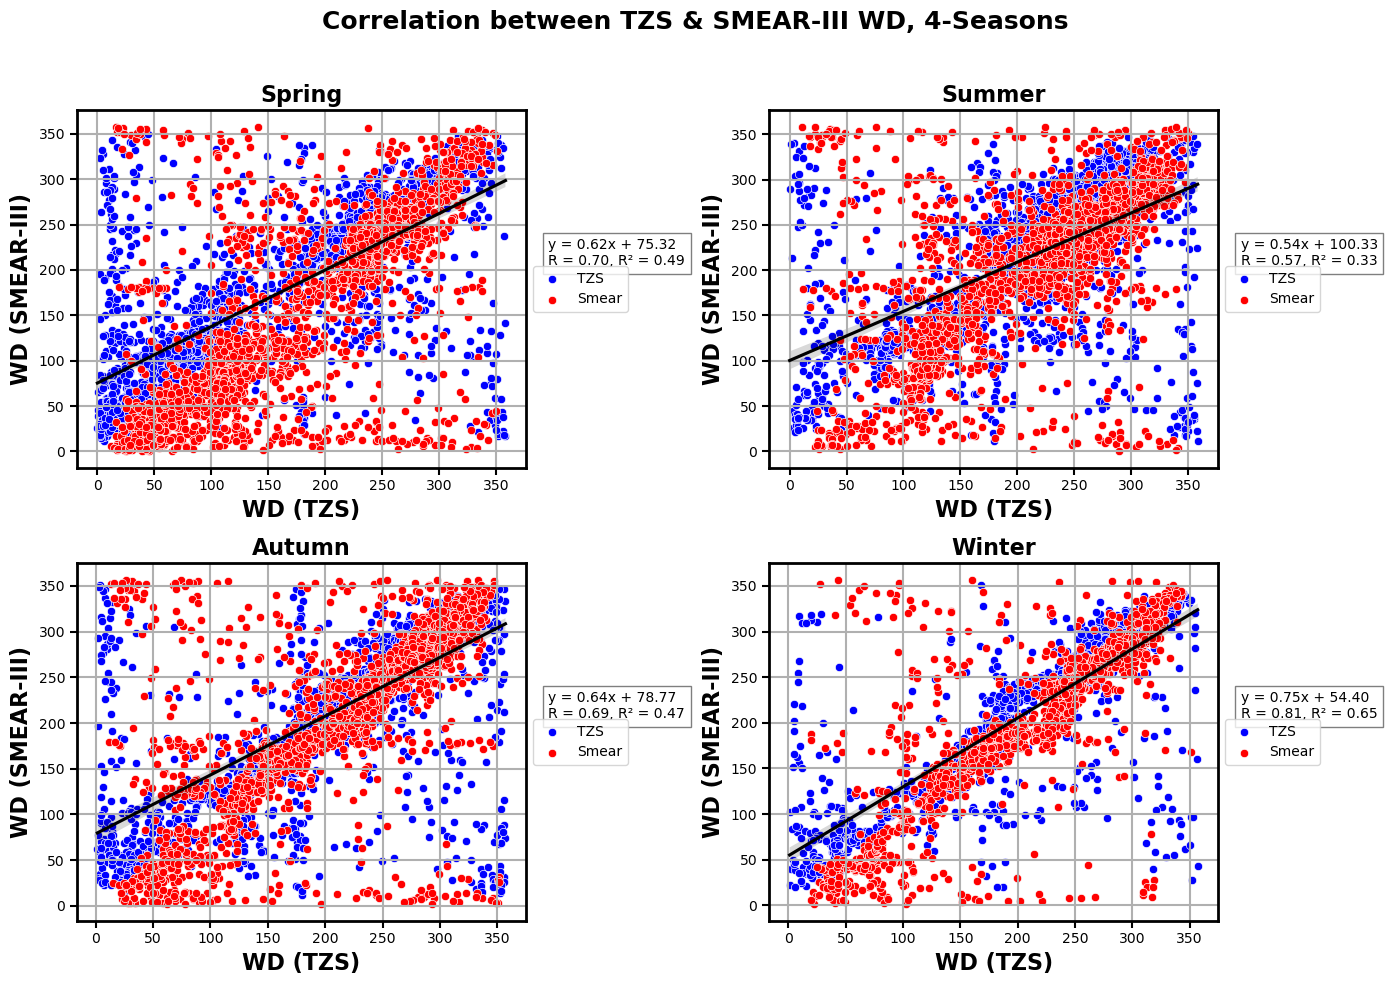

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Define file path (Update this path as needed)
file_path = '/Users/touqeergill/Desktop/Windrose (TZS and Smear).xlsx'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name='Sheet 1')

# Drop missing values and create a deep copy to avoid warnings
df_cleaned = df.dropna(subset=["WD TZS", "WD Smear"]).copy()

# Convert the timestamp column to datetime format safely
df_cleaned.loc[:, "Timestamp"] = pd.to_datetime(df_cleaned["Timestamp"])

# Extract month information safely
df_cleaned.loc[:, "Month"] = df_cleaned["Timestamp"].dt.month

# Define seasons based on Finland's classification
seasons = {
    "Spring": [3, 4, 5],
    "Summer": [6, 7, 8],
    "Autumn": [9, 10, 11],
    "Winter": [12, 1, 2]
}

# Define subplot positions
season_positions = {
    "Spring": (0, 0),
    "Summer": (0, 1),
    "Autumn": (1, 0),
    "Winter": (1, 1)
}

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Correlation between TZS & SMEAR-III WD, 4-Seasons", fontsize=18, fontweight='bold')

# Iterate through each season and create a scatter plot
for season, months in seasons.items():
    ax = axes[season_positions[season]]
    
    # Filter data for the season
    df_season = df_cleaned[df_cleaned["Month"].isin(months)]
    
    # Perform linear regression for each season
    slope, intercept, r_value, _, _ = linregress(df_season["WD TZS"], df_season["WD Smear"])
    correlation_coefficient = r_value
    r_squared = correlation_coefficient ** 2

    # Scatter plot with regression line
    sns.scatterplot(x=df_season["WD TZS"], y=df_season["WD Smear"], color="blue", ax=ax, marker="o", label="TZS")
    sns.scatterplot(x=df_season["WD Smear"], y=df_season["WD TZS"], color="red", ax=ax, marker="o", label="Smear")
    sns.regplot(x=df_season["WD TZS"], y=df_season["WD Smear"], scatter=False, color="black", ax=ax)

    # Set labels and title
    ax.set_xlabel("WD (TZS)", fontsize=16, fontweight='bold')
    ax.set_ylabel("WD (SMEAR-III)", fontsize=16, fontweight='bold')
    ax.set_title(f"{season}", fontsize=16, fontweight='bold')

    # Add correlation coefficient and equation outside the plot on the right
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}\nR = {correlation_coefficient:.2f}, R² = {r_squared:.2f}"
    ax.text(1.05, 0.6, equation_text, transform=ax.transAxes, fontsize=10, 
            color="black", bbox=dict(facecolor="white", alpha=0.5), verticalalignment='center')

    # Move legend outside the plot on the right
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Grid and border enhancements
    ax.grid(True, linewidth=1.5)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.tick_params(axis="both", direction="out", length=5, width=1.5)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()